In [231]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


cars = pd.read_csv("C:\E\CLARK\BIG DATA\Final\car_data.csv")

In [232]:
cars.info


<bound method DataFrame.info of         Unnamed: 0                                              Model  Year  \
0                0                              2022 Acura TLX A-Spec  2022   
1                1                              2023 Acura RDX A-Spec  2023   
2                2                              2023 Acura TLX Type S  2023   
3                3                              2023 Acura TLX Type S  2023   
4                4  2019 Acura MDX Sport Hybrid 3.0L w/Technology ...  2019   
...            ...                                                ...   ...   
115757       10005         2023 Volkswagen Atlas 3.6L SE w/Technology  2023   
115758       10006                       2023 Volkswagen Taos 1.5T SE  2023   
115759       10007                            2012 Volkswagen Beetle   2012   
115760       10008                         2022 Volkswagen ID.4 Pro S  2022   
115761       10009                      2013 Volkswagen Passat 2.5 SE  2013   

       Status      

In [233]:
cars.shape

(115762, 7)

In [234]:
cars.isnull().sum()

Unnamed: 0    0
Model         0
Year          0
Status        0
Mileage       0
Price         0
MSRP          0
dtype: int64

In [235]:
cars.dtypes

Unnamed: 0     int64
Model         object
Year           int64
Status        object
Mileage       object
Price         object
MSRP          object
dtype: object

# Data clean

In [236]:
cars = cars.drop('Unnamed: 0',axis=1)
cars.head()

,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [237]:
cars["Mileage"].value_counts()
#It means there are 47868 new cars in the dataset. 

Not available    47868
310 mi.            101
23,000 mi.          19
1,000 mi.           18
35,000 mi.          17
                 ...  
25,796 mi.           1
51,830 mi.           1
34,991 mi.           1
62,460 mi.           1
125,757 mi.          1
Name: Mileage, Length: 49282, dtype: int64

In [238]:
cars['Price'].value_counts()

Not Priced    652
$29,995       241
$34,995       226
$72,010       200
$39,995       192
             ... 
$82,824         1
$25,930         1
$62,949         1
$73,845         1
$47,346         1
Name: Price, Length: 37652, dtype: int64

In [239]:
len(cars.loc[cars['Price'] == 'Not Priced'])
len(cars.loc[cars['Price'] == 'Not Priced'])/len(cars)*100
#It means there are 652 cars withnot priced. 

0.5632245469152226

In [240]:
cars.drop(cars[cars['Price']== 'Not Priced'].index, inplace=True)
#Verifying if the deletion has been successful
len(cars.loc[cars['Price'] == 'Not Priced'])

0

In [241]:
def get_price (price):
    no_currency = price.replace('$', '')
    return no_currency.replace(',', '')
cars['Price'] = cars['Price'].apply(lambda x: get_price(x)).str.rstrip()
cars['Price'] = pd.to_numeric(cars['Price'])
cars['Price'].head()

0    49445
1    50895
2    57745
3    57545
4    40990
Name: Price, dtype: int64

In [242]:
def change_status(status):
  if("Certified" in status):
    return "Certified"
  return status
cars["Status"] = cars["Status"].apply(change_status)
cars.head()

,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,New,Not available,49445,"MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,50895,Not specified
2,2023 Acura TLX Type S,2023,New,Not available,57745,Not specified
3,2023 Acura TLX Type S,2023,New,Not available,57545,Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.",40990,$600 price drop


In [243]:
def car_brand (model):
    return model.split(' ')[1]
cars['Brand'] = cars['Model'].apply(lambda x: car_brand(x))
cars.head()

,Model,Year,Status,Mileage,Price,MSRP,Brand
0,2022 Acura TLX A-Spec,2022,New,Not available,49445,"MSRP $49,445",Acura
1,2023 Acura RDX A-Spec,2023,New,Not available,50895,Not specified,Acura
2,2023 Acura TLX Type S,2023,New,Not available,57745,Not specified,Acura
3,2023 Acura TLX Type S,2023,New,Not available,57545,Not specified,Acura
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.",40990,$600 price drop,Acura


In [244]:
def extract_model(model):
  m = model.split(" ")
  return " ".join(m[2:4])
cars["Model"] = cars["Model"].apply(extract_model)
cars["Model"].head(10)

0    TLX A-Spec
1    RDX A-Spec
2      TLX Type
3      TLX Type
4     MDX Sport
5    TLX A-Spec
6    TLX A-Spec
7      TLX Type
8    TLX A-Spec
9    TLX A-Spec
Name: Model, dtype: object

In [245]:
cars["Mileage"].replace("Not available","0 mi.",inplace=True)
cars["Mileage"].head()

0         0 mi.
1         0 mi.
2         0 mi.
3         0 mi.
4    32,675 mi.
Name: Mileage, dtype: object

In [246]:

def mileage_trans(mileage):
    
    return mileage.split(' ')[0].replace(",","")
cars['Mileage'] = cars['Mileage'].apply(lambda x: mileage_trans(x))
cars['Mileage'] = pd.to_numeric(cars['Mileage'])
cars['Mileage'].head()

0        0
1        0
2        0
3        0
4    32675
Name: Mileage, dtype: int64

In [247]:
cars["Status"].value_counts()

Used         61627
New          47434
Certified     6049
Name: Status, dtype: int64

In [248]:
pd.options.display.float_format = '{:.2f}'.format
cars["Price"].describe()


count    115110.00
mean      51517.99
std       37931.87
min        1800.00
25%       29980.00
50%       43275.00
75%       61280.00
max     2499900.00
Name: Price, dtype: float64

In [249]:
price_mean = cars['Price'].mean()
price_std = cars['Price'].std()

price_lower_bound = price_mean - 3 * price_std
price_upper_bound = price_mean + 3 * price_std

cars = cars.mask((cars['Price'] < price_lower_bound) | (cars['Price'] > price_upper_bound))

cars = cars.dropna()


In [250]:
cars["Mileage"].describe()

count   113868.00
mean     28517.02
std      38069.69
min          0.00
25%          0.00
50%      12078.50
75%      46249.25
max     833944.00
Name: Mileage, dtype: float64

In [251]:
cars["Year"].value_counts()

2023.00    34606
2022.00    19967
2020.00    10091
2021.00     9646
2019.00     9617
           ...  
1960.00        2
1965.00        2
1953.00        1
1949.00        1
1966.00        1
Name: Year, Length: 69, dtype: int64

# Visualiation

In [252]:
bd = cars["Brand"].value_counts()
fig = px.bar(
    x = bd.index,
    y = bd.values,
    color = bd.index,
    color_discrete_sequence = px.colors.sequential.PuBuGn,
    text = bd.values,
    title = "Cars brands Sales ",
    
)
fig.update_layout(
    xaxis_title = "cars brands",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)

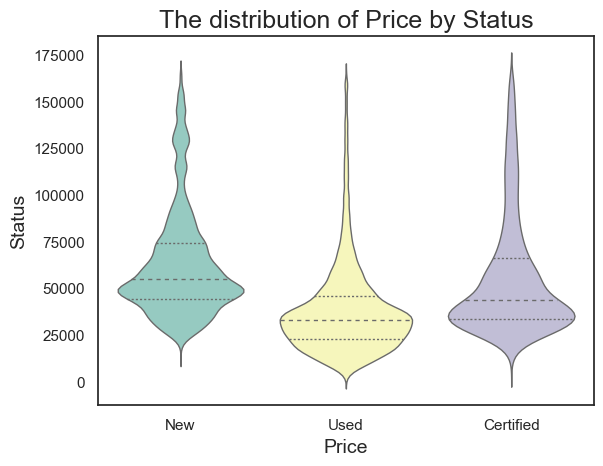

In [253]:
import matplotlib.pyplot as plt

sns.set_style('white')

sns.violinplot(x='Status', y='Price', data=cars, palette='Set3', linewidth=1, width=0.8, inner='quartile')


plt.title('The distribution of Price by Status', fontsize=18)

plt.xlabel('Price', fontsize=14)
plt.ylabel('Status', fontsize=14)

plt.show()